## Instructions

Team Members:

* Deepan Chakravarthi Padmanabhan
* Jaswanth Bandlamudi
* Muhammad Umer Ahmed Khan

1. Read chapter 2 from Haykin’s book until 2.13 (leaving out Statistical learning theory to end of chapter) and summarize or sketch your insights in mind-map or an outline or a summary. [4 points]

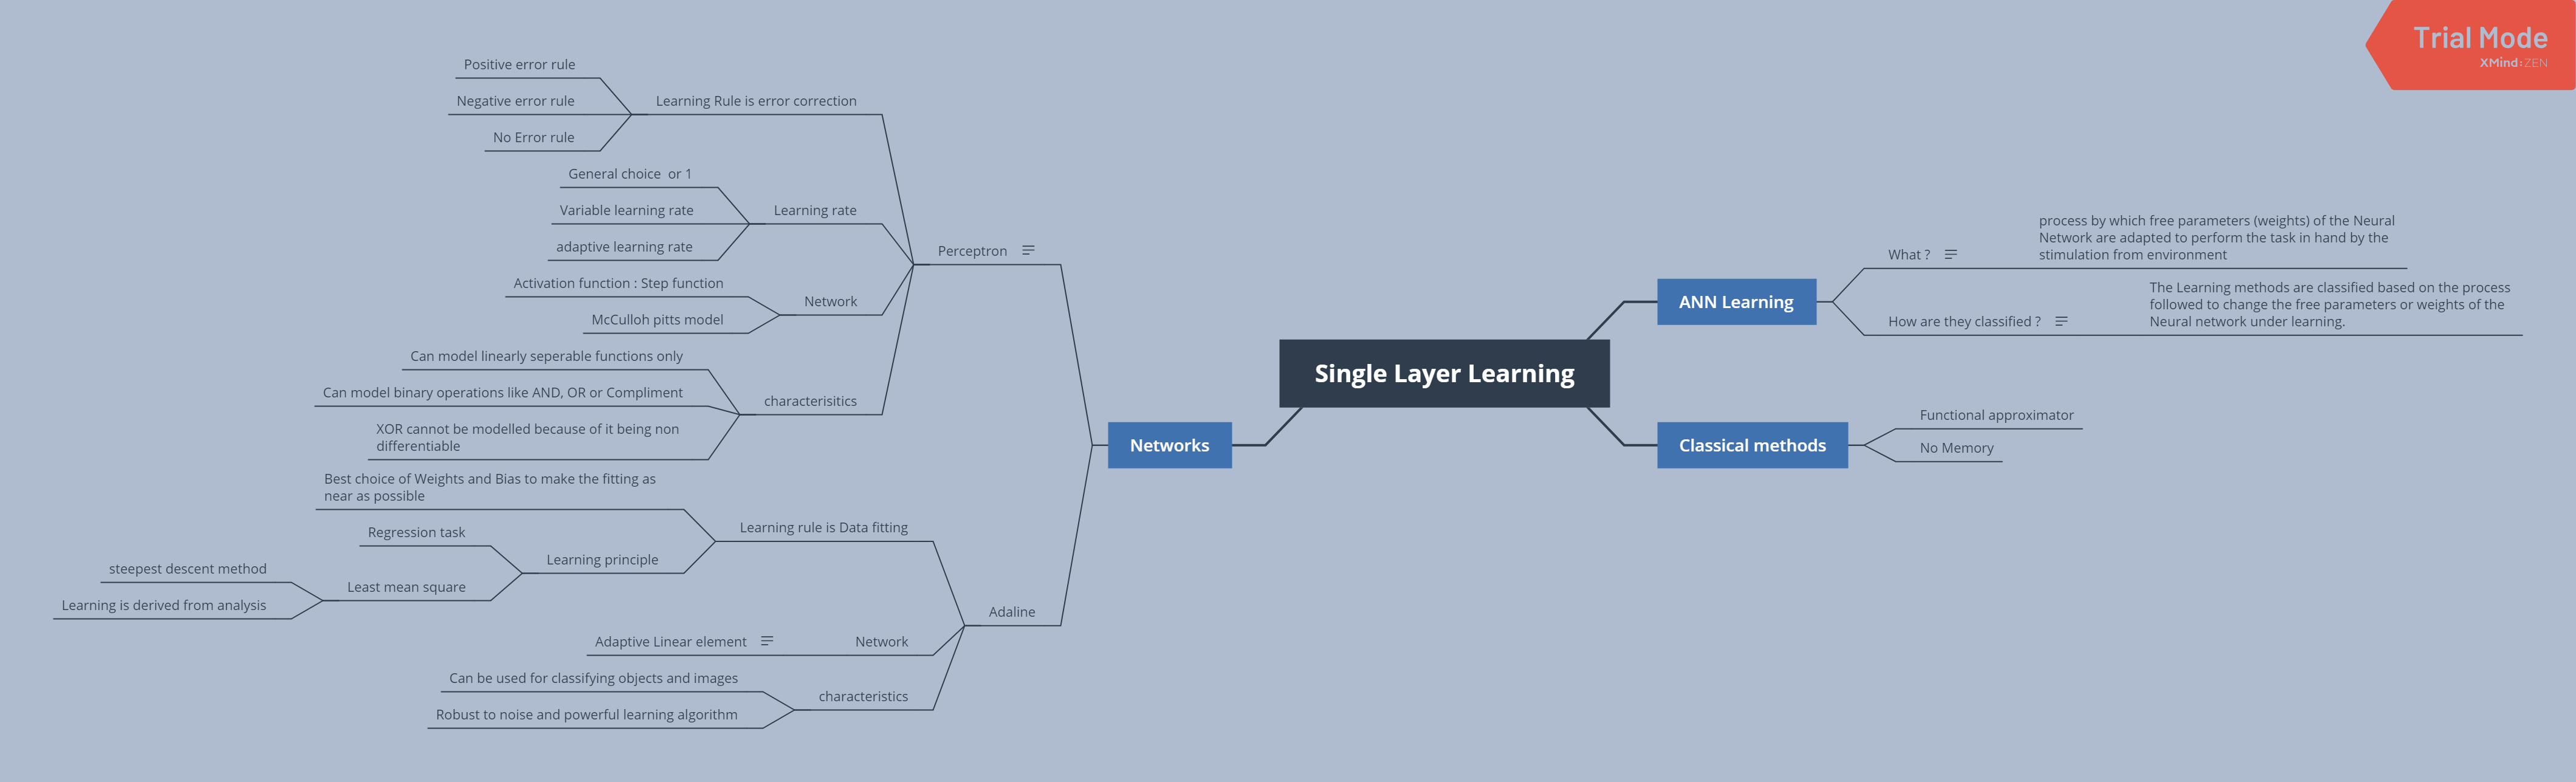

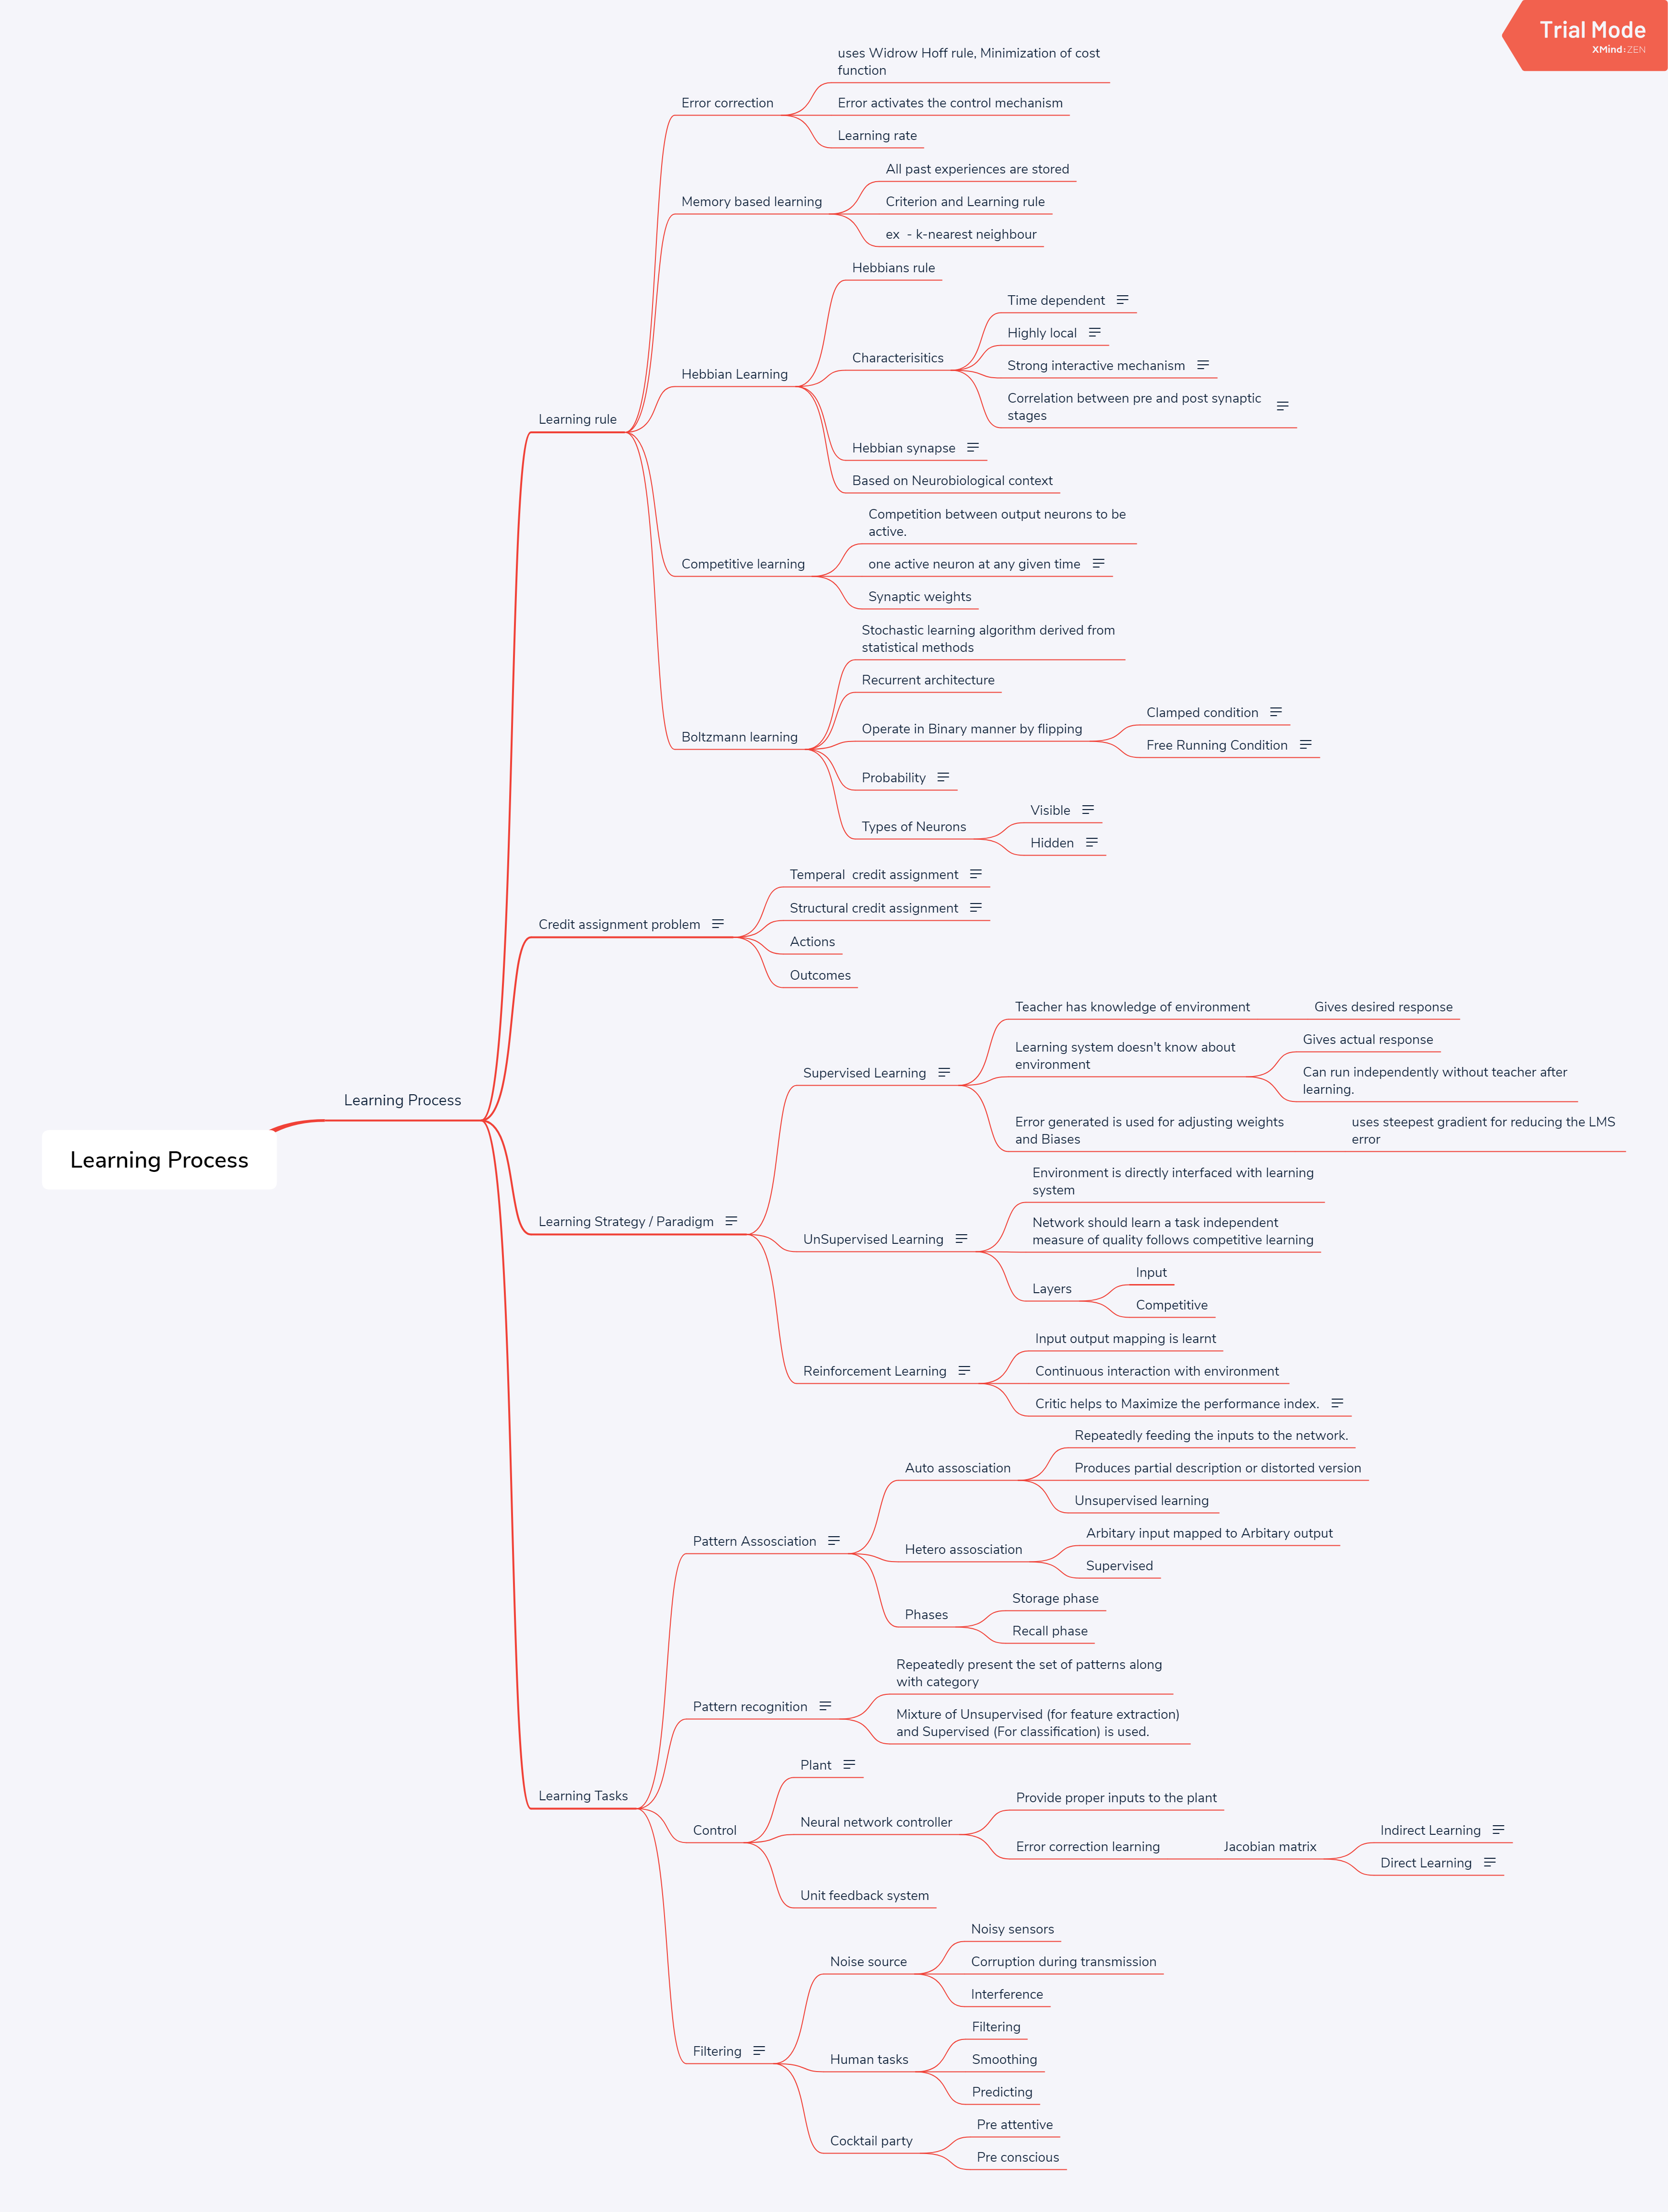

In [1]:
from IPython.display import display, Image
image1 = Image(filename='Single Layer Learning.png') 
image2 = Image(filename='Learning Process.png') 
display(image1,image2)

 2. Write down 3 questions and their brief answers on the reading material. [2 Points]

1) What is learning in Neural Networks ? 
    
It is a process by which the free parameters of a NN are adjusted through a process of stimulation by the environment in which the network is embedded. The learning is segregated based on the manner in which the parameter change takes place.

2) How does Adaline and Perceptron differentiate ?

i. Model wise the perceptron uses a Non linear activation function (ex: Step function) and ADALINE uses Linear output activation function.

ii. Error correction is in Finite number of steps in Perceptron where as in ADALINE the learning is continuous to reduce the error calculating LMS algorithm using steepest descent method.

3) What are different types of learning rules?

i. Error correction learning or Widrow-Hoff or delta rule.The adjustment made to a synaptic weight of a neuron is proportional to the product of the error signal and input signal of the synapse.
    
ii. Memory based learning: In memory based learning, all(or most) of past experiences are explicitly stored in a large memory of correctly classified input-output examples. Whenever any new data or test data is introduced, euclidean distance b/w new data point and existing training examples is computed. Based on k-nearest neighbors, classier assigns class to new data point.
    
iii. Hebbian learning(If two neurons on either side of a synapse(connection) are activated simultaneously(i.e synchrnously) then the strength of that synapse is selectively increased. Another rule: If two neurons on either side of a synapse are activated asynchronusly then the synapse is selectively weakend or eliminated)	
    
iv. Competitive learning (Neurons compete among themselves to become active, and only a single output neuron is active at any one time. (Unsupervised) (see architecture from slides).
    
v. Boltzmann learning(It is recurrent ANN, has two groups; visible and hidden neurons, it operates by flipping, each time hidden and visible neurons are flipped. Two modes of operation: i. Clamped condition in which the visible neurons are all clamped onto specified states determined by the env. ii. Free-running condition: In which all the neurons (visible and hidden) are allowed to operate freely. 
    
    
Reference: Simon Haykin, Neural Networks and Learning Machines: A Comprehensive Foundation: Third Edition, 2009.

3. Do the problem 1.13 (Network architecture) from the previous week’s assignment again by visualising the output of the neuron using 3d view. Assume the network presented in fig P1.13 is a binary-classifier, please depict how the input space (R2) is classified on a 3D graph using different colors. [8 points] 

In [8]:
# Import required tools and libraries
import sympy as sp
import numpy as np
from IPython.display import display,Latex, Markdown
import math
import matplotlib.pyplot as plt
from matplotlib import cm
sp.init_printing("use=latex")
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.colors import ListedColormap
import plotly.express as px
import pandas as pd
from sklearn import datasets

Binary classifier with threshold activation function in the final layer


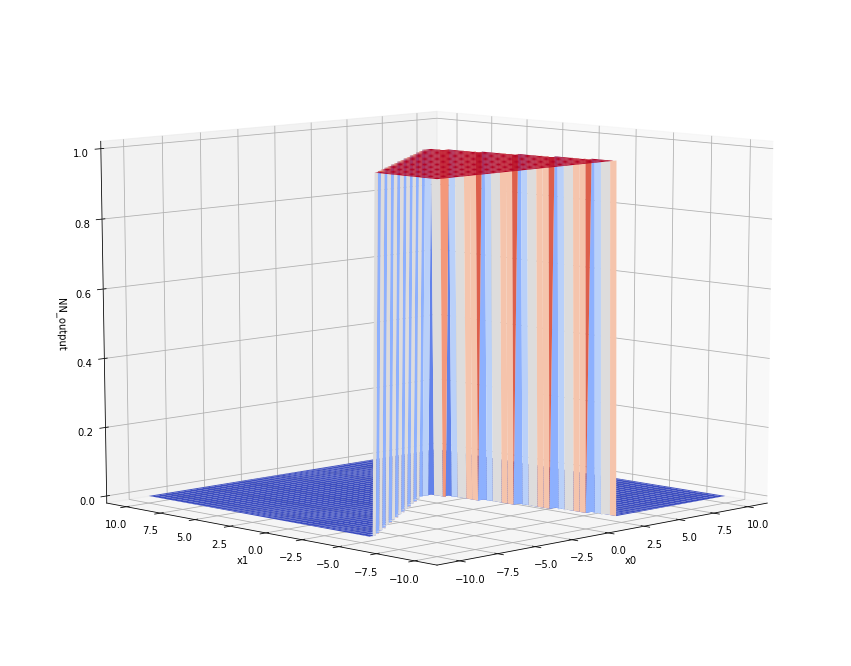

NN output with all layers sigmoid


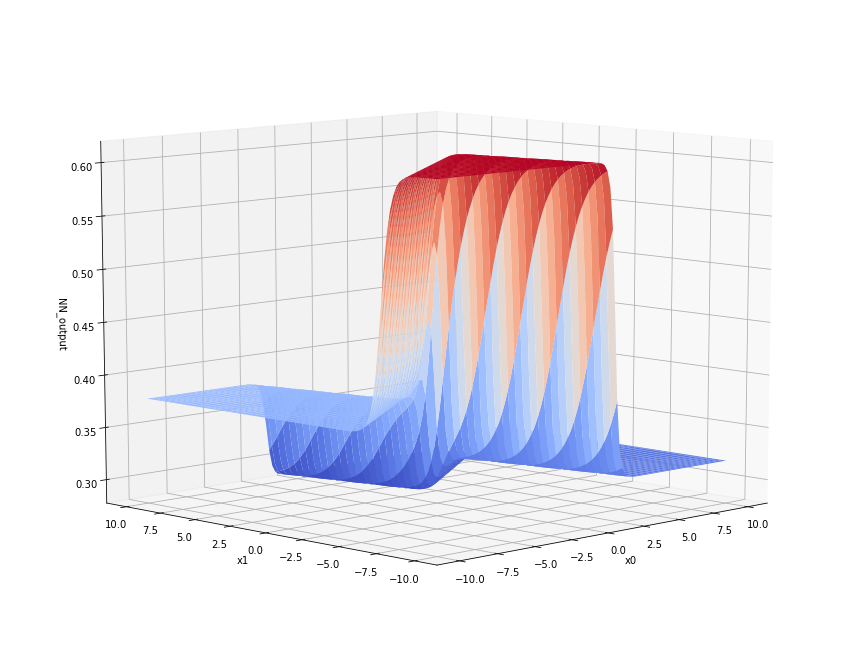

In [3]:
def NN_binary_classifier(x_1,x_2):
    a = 1
    v = 5*x_1+x_2
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron1_output = logistic_sigmoid

    v = 2*x_1-3*x_2
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron2_output = logistic_sigmoid

    v= 3*neuron1_output-1*neuron2_output
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron3_output = logistic_sigmoid

    v= 4*neuron1_output+6*neuron2_output
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron4_output = logistic_sigmoid

    v= -2*neuron3_output+neuron4_output
    output = list()
    for i in v:
        # Threshold fixed by examining the output value from the network
        # This is kept threshold for binary classification
        if i > -0.3:
            output.append(1)
        else:
            output.append(0)
    neuron5_output = output

    return (neuron5_output)

def NN_fully_sigmoid(x_1,x_2):
    a = 1
    v = 5*x_1+x_2
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron1_output = logistic_sigmoid

    v = 2*x_1-3*x_2
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron2_output = logistic_sigmoid

    v= 3*neuron1_output-1*neuron2_output
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron3_output = logistic_sigmoid

    v= 4*neuron1_output+6*neuron2_output
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron4_output = logistic_sigmoid

    # Final layer is sigmoid activation function
    v= -2*neuron3_output+neuron4_output
    logistic_sigmoid = 1/(1+np.exp(-a*v))
    neuron5_output = logistic_sigmoid

    return (neuron5_output)



fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection = '3d')
x1_array = x0_array = np.linspace(-10.0,10.0,100)
X0,X1 = np.meshgrid(x0_array, x1_array)
zs = np.array(NN_binary_classifier(np.ravel(X0), np.ravel(X1)))
print("Binary classifier with threshold activation function in the final layer")
Z = zs.reshape((X0.shape))
ax.plot_surface(X0,X1,Z,cmap=cm.coolwarm,linewidth=0.5)
ax.view_init(elev = 10, azim = 225)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('NN_output')
plt.show()


# INTERACTIVE PLOT FOR BINARY CLASSIFER OUTPUT
# The plot can be viewed in different perspectives and pointed to check values at a specific location in 3D.
# In addition, the tool helps to download a screenshot at different perspectives.

data = {'x0': X0[0], 'x1': X1[0], 'NN_output': Z[0]}
data_interactive_plot= pd.DataFrame(data = data)
fig = px.scatter_3d(data_interactive_plot, x="x0", y="x1",z='NN_output',color='NN_output')
fig.show()
plt.show()

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection = '3d')
x1_array = x0_array = np.linspace(-10.0,10.0,100)
X0,X1 = np.meshgrid(x0_array, x1_array)
zs = np.array(NN_binary_classifier(np.ravel(X0), np.ravel(X1)))
zs = np.array(NN_fully_sigmoid(np.ravel(X0), np.ravel(X1)))
print("NN output with all layers sigmoid")
Z = zs.reshape((X0.shape))
ax.plot_surface(X0,X1,Z,cmap=cm.coolwarm,linewidth=0.5)
ax.view_init(elev = 10, azim = 225)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('NN_output')
plt.show()

# INTERACTIVE PLOT FOR ALL LAYERS WITH SIGMOID ACTIVATION FUNCTION
# The plot can be viewed in different perspectives and pointed to check values at a specific location in 3D.
# In addition, the tool helps to download a screenshot at different perspectives.

data = {'x0': X0[0], 'x1': X1[0], 'NN_output': Z[0]}
data_interactive_plot= pd.DataFrame(data = data)
fig = px.scatter_3d(data_interactive_plot, x="x0", y="x1",z='NN_output',color='NN_output')
fig.show()
plt.show()

# raise NotImplementedError()

4. Adjust the data at the "New Classification Example (now *with* bias)" slide, such that a bais becomes necessary (not 0). Validate the perceptron learning algorithm. [8 points]

Weight value after the updates (Augmented with bias value) [[-1  2 -1]]

Final weight (2, -1)

Bias -1

In the below graph, it is clear the bias is -1 from the y-intercept value.


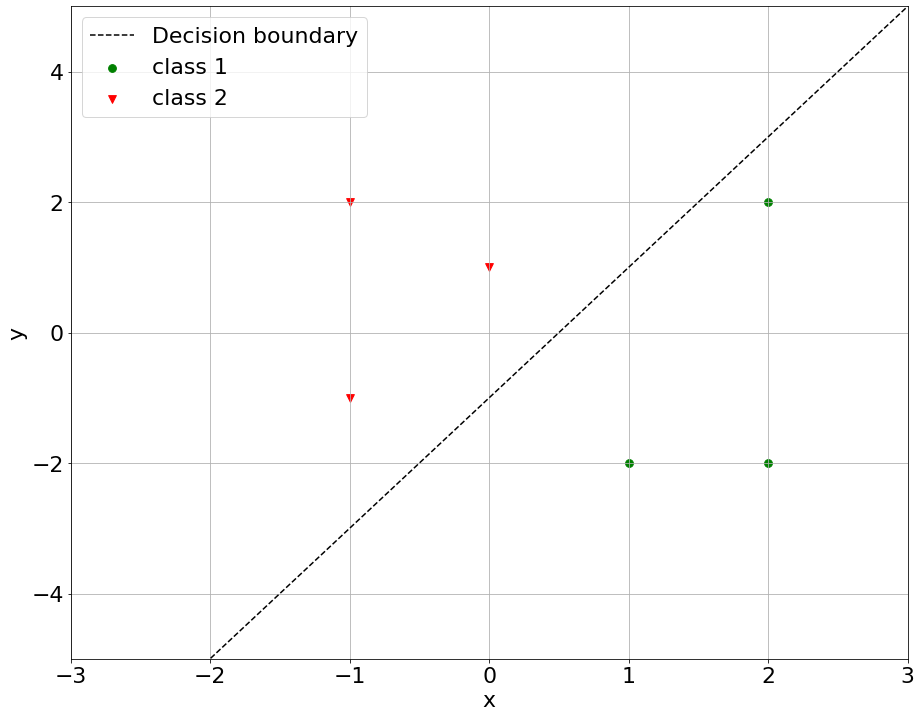

In [4]:
def check_update(learning_rate, weight_value, data):
    update_flag = list()
    for i in data:
        value =np.sum(weight_value * i)
        if value >0:
            weight_value = weight_value
            update_flag.append(False)
        else:  
            weight_value = weight_value + (learning_rate * i)
            update_flag.append(True)
    if not any(update_flag):
        print('Weight value after the updates (Augmented with bias value)', weight_value)
        return weight_value
    else:
        return check_update(learning_rate, weight_value, data)

def augmentation(x,y,b):
    x = x.T
    y = y.T
    b_stack = np.full(shape=x.shape,fill_value=b)
    data_augmented = np.hstack((b_stack,x,y))
    return data_augmented

def plot_desicison_boundary(final_weight):
    c = final_weight[0][0]
    m = final_weight[0][1]
    a = final_weight[0][2]
    x = np.linspace(-3,3,1000)
    # decision boundary = b + w1 *x + w2* y
    y = -(m*x + c)/a 
    plt.xlim([-3,3])
    plt.ylim([-5,5])
    plt.plot(x,y,'--',label='Decision boundary', c='k')
    plt.legend()
    plt.show()

bias = 1
learning_rate = 1
initial_weight = np.array([[bias,0,0]])
plt.figure(figsize = (15,12))
plt.rcParams.update({'font.size': 22})
# x1 = np.array([[1,1,0]])
# y1 = np.array([[1,-1,-1]])
x1 = np.array([[2,2,1]])
y1 = np.array([[2,-2,-2]])
plt.scatter(x1,y1,c='g',label='class 1',marker='o', s=60)

# x2 = np.array([[-1,-1,0]])
# y2 = np.array([[-1,1,1]])
x2 = np.array([[-1,-1,0]])
y2 = np.array([[-1,2,1]])
plt.scatter(x2,y2,c='r',label='class 2', marker= 'v', s=60)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


class1 = augmentation(x1,y1,bias)
class2 = -1*augmentation(x2,y2,bias)
data = np.vstack((class1,class2))
final_weight = check_update(learning_rate, initial_weight, data)
print("\nFinal weight", (final_weight[0][1],final_weight[0][2]))
print("\nBias", final_weight[0][0])
print("\nIn the below graph, it is clear the bias is -1 from the y-intercept value.")
plot_desicison_boundary(final_weight)
# raise NotImplementedError()

5. Program the perceptron learning algorithm as binary classifier in Python. Define two functions: learn_pecptron and evaluate_perceptron. The learn_pecptron function are learning rate, positive and negative data.[8 points]


Final bias value: 0.05781112344320846

Final weight: (-0.9939850881055685, 0.09301354003584161)


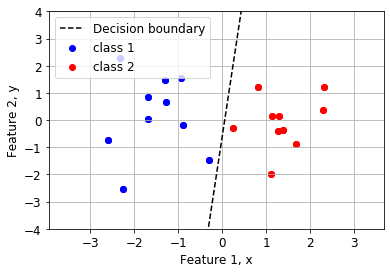

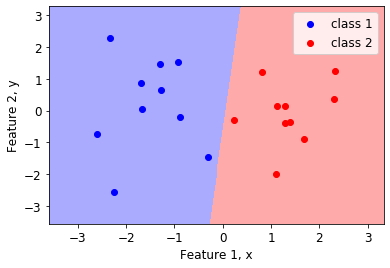

Accuracy in % 100.0


In [144]:
def get_data_label(class1,class2):
    class1_labels = class1[:,2][np.newaxis].T
    class1_data = class1[:,0:2]
    class2_labels = class2[:,2][np.newaxis].T
    class2_data = class2[:,0:2]
    data = np.vstack((class1_data,class2_data))
    labels = np.vstack((class1_labels,class2_labels))
    return data,labels

def learn_percptron(learning_rate, class1, class2, epoch, bias, initial_weight):
    iterations = 0
    weight = initial_weight
    data, labels = get_data_label(class1,class2)  
    bias_vector = np.full(shape=(data.shape[0],1),fill_value=bias)
    data = np.hstack((bias_vector, data))
    labels = labels.T
    
    for _ in np.arange(epoch):
        y = np.dot(weight, data.T)
        error = (labels - y)
        component = np.dot(error,data)* learning_rate
        weight = weight + component
        iterations = iterations+1
    return weight


def evaluate_perceptron(weight, class1, class2):
    # Constructs the hyperplane to verify the final weight given by the perceptron
    values = np.hstack((class1[:,0],class2[:,0]))
    x_min = min(values)
    x_max = max(values)
    x = np.linspace(x_min-1,x_max+1,1000)
    weight = weight/np.linalg.norm(weight)
    print("\nFinal bias value:",weight[0][0])
    print("\nFinal weight:", (weight[0][1],weight[0][2]))
    y = -(weight[0][1]*x+weight[0][0])/weight[0][2]
    plt.rcParams.update({'font.size': 12})
    plt.plot(x,y,'--',label='Decision boundary',c='k')
    plt.grid(True)
    plt.scatter(class1[:,0], class1[:,1], c='b', label='class 1')
    plt.scatter(class2[:,0], class2[:,1], c='r', label='class 2')
    plt.xlabel("Feature 1, x")
    plt.ylabel("Feature 2, y")
    plt.ylim([-4,4])
    plt.legend()
    plot_mesh(weight, class1, class2)
    evaluate_accuracy(weight, class1, class2)
    
def predict(weight, inputs):
    
    # classification rule for perceptron
    
    # y = sum(w*x.T) +bias
    # y>0 -> class 1
    # y<0 -> class 2
    
    summation = sum(np.dot(weight[0][1:][np.newaxis], inputs.T)) + weight[0][0]
    activation_list = list()
    for i in summation:
        if i > 0:
            activation_list.append(1)
        else:
            activation_list.append(0)
    return np.array([activation_list])

def evaluate_accuracy(weight, class1, class2):
    data, labels = get_data_label(class1, class2)
    X = data
    predictions = predict(weight, X)
    prediction_list = predictions[0]
    label_list = labels.T[0]
    misclassified = 0
    for i,j in zip(prediction_list,label_list):
        if i!=j:
            misclassified = misclassified +1
    accuracy =100- (misclassified*100 /len(labels))
    print("Accuracy in %",accuracy)

def plot_mesh(weight, class1, class2):
    data, labels = get_data_label(class1, class2)
    X = data
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = predict(weight,np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(class1[:, 0], class1[:, 1],c='b', label='class 1')
    plt.scatter(class2[:,0], class2[:,1], c='r', label='class 2')
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.xlabel('Feature 1, x')
    plt.ylabel('Feature 2, y')
    plt.legend()
    plt.show()
    

def generate_binary_dataset(num_samples,num_features):
#     Generates linearly separable dataset
    non_separable = False
    np.random.seed(0)
    while not non_separable:
        samples = sklearn.datasets.make_classification(n_samples=num_samples, n_features=num_features, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
        red = samples[0][samples[1] == 0]
        blue = samples[0][samples[1] == 1]
        non_separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
   
    plt.scatter(red[:,0],red[:,1],c='b')
    plt.scatter(blue[:,0],blue[:,1],c='r')
    
    
    ones = np.ones(shape=(red.shape[0],1))
    zeros = np.zeros(shape=(blue.shape[0],1))
    class1 = np.hstack((red,ones))
    class2 = np.hstack((blue,zeros))
    return class1,class2


bias = 1
initial_weight = np.array([[bias, 1, 0.8]])
epoch = 5
num_features = 2
num_samples = 20
learning_rate = 0.1
# Generate a random binary dataset
class1, class2 = generate_binary_dataset(num_samples,num_features)
# Learn a perceptron for the dataset generated based on the parameters defined above
weight= learn_percptron(learning_rate, class1, class2, epoch, bias, initial_weight)
# Evaluate the perceptron
evaluate_perceptron(weight, class1, class2)




# raise NotImplementedError()

# Findings

1. The decision boundary is clearly visible in the plots above. However, an interesting finding is, though a fine horizontal boundary is available between the classes the perceptron could not find it because of the trade of between the initial weight given, number of epochs and learning rate.

2. The training is done for 5 epoch with a learning rate of 0.1.

3. The initial weight assumpltion highly determines the accuracy of the prediction

4. In addition, learning rate and epoch also affects the accuracy of prediction



# Learnings

In [13]:
# Check all entries of a array for a particular threshold value
a = np.array([[0,0,0,2,0,0]])
(a<1).all()

False